In [9]:
from google.colab import drive
drive.mount('/content/ARN')

Mounted at /content/ARN


In [17]:
import pandas as pd
arnold = pd.read_csv('/content/ARN/MyDrive/data Science practicals/accident_data.csv')
print("Shape of the dataset:", arnold.shape)
arnold.head(20)


Shape of the dataset: (9, 6)


,Accident Severity,Weather Conditions,Road Type,Vehicle Speed,Driver Age,Time of Day
0,2,rainy,urban road,45,35,morning
1,3,foggy,highway,70,28,evening
2,4,clear,rural road,60,42,afternoon
3,2,snowy,urban road,35,56,night
4,5,clear,highway,80,23,morning
5,3,rainy,rural road,55,47,afternoon
6,4,foggy,urban road,50,31,evening
7,2,clear,rural road,40,49,night
8,3,clear,urban road,30,39,morning


In [18]:
import pandas as pd
arnold = pd.read_csv('/content/ARN/MyDrive/data Science practicals/accident_data.csv')
data=arnold.loc[:,['Accident Severity','Vehicle Speed']]
data.head(20)

,Accident Severity,Vehicle Speed
0,2,45
1,3,70
2,4,60
3,2,35
4,5,80
5,3,55
6,4,50
7,2,40
8,3,30


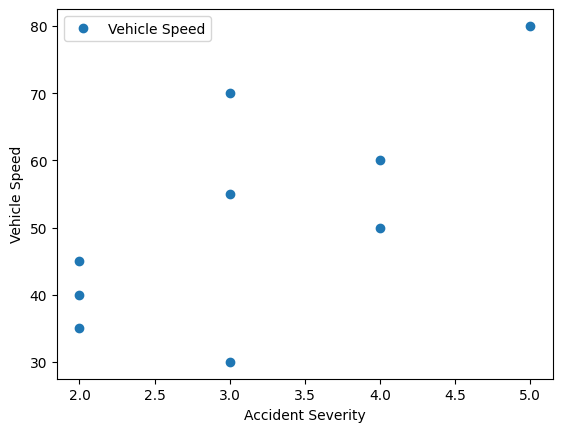

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
arnold = pd.read_csv('/content/ARN/MyDrive/data Science practicals/accident_data.csv')
arnold.plot(x='Accident Severity',y='Vehicle Speed',style='o')
plt.xlabel('Accident Severity')
plt.ylabel('Vehicle Speed')
plt.show()

In [20]:
import pandas as pd
arnold = pd.read_csv('/content/ARN/MyDrive/data Science practicals/accident_data.csv')
x=pd.DataFrame(data['Accident Severity'])
y=pd.DataFrame(data['Vehicle Speed'])

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
arnold = pd.read_csv('/content/ARN/MyDrive/data Science practicals/accident_data.csv')
x=pd.DataFrame(data['Accident Severity'])
y=pd.DataFrame(data['Vehicle Speed'])
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7, 1)
(2, 1)
(7, 1)
(2, 1)


In [26]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [27]:
print(regressor.intercept_)

[19.82142857]


In [28]:
print(regressor.coef_)

[[11.25]]


In [29]:
y_pred = regressor.predict(X_test)
y_pred

array([[53.57142857],
       [64.82142857]])

In [23]:

y_test.head(20)

,Vehicle Speed
8,30
2,60


In [30]:
from sklearn import metrics
import numpy as np
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 14.19642857142857
Mean Squared Error (MSE): 289.4292091836734


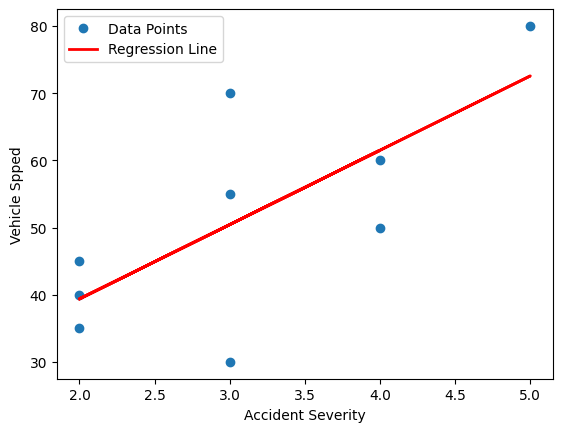

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Load the data
arnold = pd.read_csv('/content/ARN/MyDrive/data Science practicals/accident_data.csv')

X = arnold[['Accident Severity']]
y = arnold['Vehicle Speed']

regressor = LinearRegression()
regressor.fit(X, y)

arnold.plot(x='Accident Severity', y='Vehicle Speed', style='o', label='Data Points')

plt.plot(X, regressor.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel('Accident Severity')
plt.ylabel('Vehicle Spped')
plt.legend()
plt.show()

In [38]:
import joblib
import pickle
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)
joblib.dump(model, 'linear_regression_model.pkl')
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [34]:
import joblib
import numpy as np
import pandas as pd
new_X = np.array([9.8, 7, 8, 9, 10]).reshape(-1, 1)
model = joblib.load('linear_regression_model.pkl')
predictions = model.predict(new_X)
new_data = pd.DataFrame({'X': new_X.flatten(), 'Predicted_Y': predictions.flatten()})
print(new_data)

      X  Predicted_Y
0   9.8     125.6625
1   7.0      94.6875
2   8.0     105.7500
3   9.0     116.8125
4  10.0     127.8750


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
